In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

import os

In [13]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                      # transforms.Normalize([0.5, 0.5, 0.5], 
                                     #                       [0.5, 0.5, 0.5])
                                      ])

test_transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [6]:
train_path = os.path.join(os.getcwd(), 'Cat_Dog_data', 'Cat_Dog_data', 'train')
test_path = os.path.join(os.getcwd(), 'Cat_Dog_data', 'Cat_Dog_data', 'test')

In [18]:
train_data = datasets.ImageFolder(train_path, transform=train_transforms)

test_data = datasets.ImageFolder(train_path, transform=test_transforms)

In [19]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = False)


<AxesSubplot:>

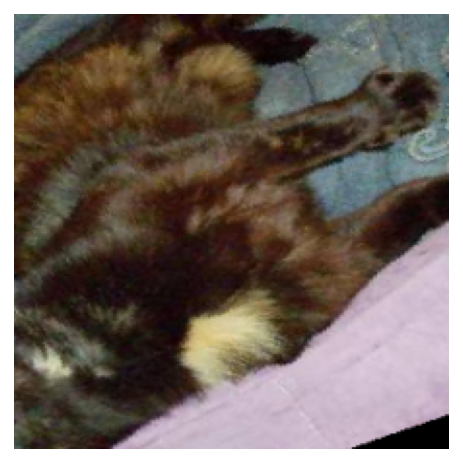

In [26]:
images, labels = next(iter(trainloader))
helper.imshow(images[0], normalize=False)

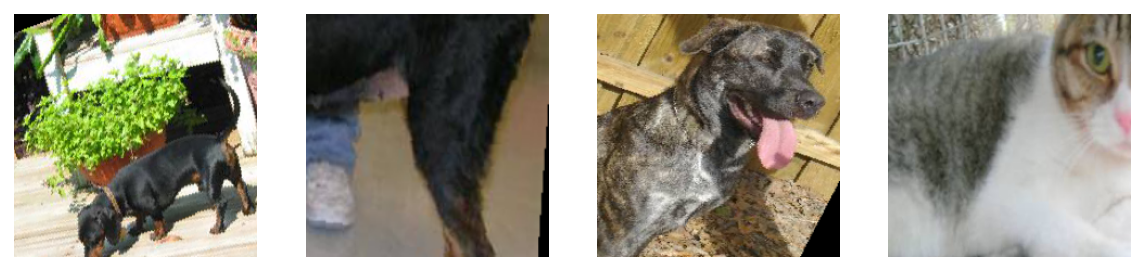

In [24]:
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [27]:
from torchvision import datasets, transforms, models

In [28]:
model = models.densenet121(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/gabriel/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100.0%


In [29]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(1024, 500)),
    ('relu', nn.ReLU()),
    ('fc2', nn.Linear(500,2)),
    ('output', nn.LogSoftmax(dim=1))
    
]))

model.classifier = classifier 

In [30]:
import time

In [ ]:
model.cuda()
images.cuda()

model.cpu(), images.cpu()  

for cuda in [False, True]:
    criterion = torch.nn.NLLLoss()
    
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
    
    if cuda:
        model.cuda
    else:
        modl.cpu()
    
    for ii, (inputs, labels) in enumerate(trainloader):
        inputs, labels = Variable(inputs), Variable(labels)
        
        if cuda:
            inputs, labels = inputs.cuda(), labels.cuda()
            
        start = time.time()
        
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if ii==3:
            break

In [32]:
torch.cuda.is_available()

False